# Exploratory Data Analysis (EDA)

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import loguniform
from sklearn.pipeline import make_pipeline
from pickle import dump

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

# set this to False to avoid GridSearchCV
debug = False

# specify the resource folder where the datas and model is stored
resource_folder = "res"

Importing datasets manually

In [306]:
df_red = pd.read_csv(f'{resource_folder}/winequality-red.csv', sep=';')
df_white = pd.read_csv(f'{resource_folder}/winequality-white.csv', sep=';')

Adding a color column to the datasets

In [307]:
df_red['color'] = 0    # for red
df_white['color'] = 1  # for white
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Applying oversampling to the red dataset so it does not have a lot less values than white

In [308]:

X_red = df_red.drop(columns='quality')
y_red = df_red['quality']

smote = SMOTE(random_state=42)
X_red_resampled, y_red_resampled = smote.fit_resample(X_red, y_red)

Concatenating the red and white datasets to have a single one

In [309]:
red_wine_resampled = pd.concat([
    pd.DataFrame(X_red_resampled, columns=X_red.columns),
    pd.Series(y_red_resampled, name='quality')
], axis=1)

data = pd.concat([red_wine_resampled, df_white], ignore_index=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


### Dataset Overview After Preprocessing

After applying SMOTE to balance the red wine classes, we merged the red and white datasets into a single dataset. This ensures a more uniform distribution across wine types and quality levels, simplifying further processing and model training.

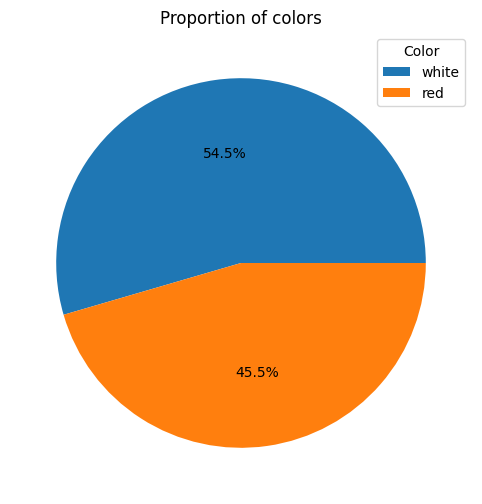

In [310]:
colors = data['color'].map({0: 'red', 1: 'white'})
count = colors.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of colors')
plt.legend(labels=count.index, title="Color", loc="best")
plt.show()

Now the dataset is pretty balanced among the two classes of colors

## Regrouping the Target Classes

To address class imbalance, we regrouped the original wine quality scores as follows:

- **3–4 → Class 1**: Low quality  
- **5 → Class 2**: Medium-low quality  
- **6 → Class 3**: Medium-high quality  
- **7–8–9 → Class 4**: High quality  

This regrouping helps reduce the number of target classes while preserving a meaningful quality scale.


In [311]:
data['quality'] = data['quality'].replace({
    3: 1, 4: 1,
    5: 2,
    6: 3,
    7: 4, 8: 4, 9: 4
})


In [312]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,3
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,2
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,3
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,4


## Expolaratory Data analysis

We start with a pie chart to look at the proportion of quality levels

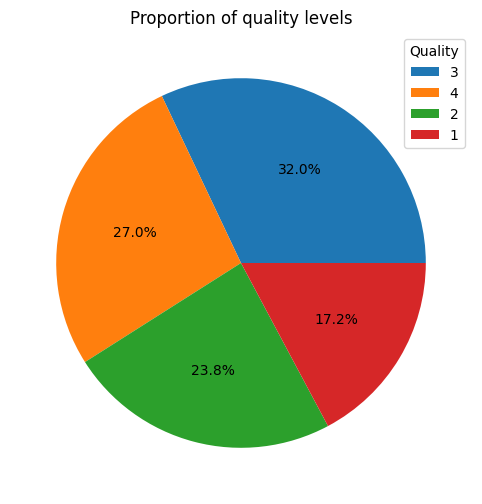

In [313]:
y = data['quality']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

The distribution looks acceptable, but I will try applying oversampling to balance the number of occurrences across the different quality categories.

### SMOTE

In [314]:
X = data.drop(columns='quality')
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=938)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
9821,10.167775,0.619415,0.460501,2.081171,0.192343,5.062764,15.748946,0.999187,3.184478,0.630000,8.497283,0
2904,6.115918,0.556617,0.005173,2.186735,0.078735,6.013265,9.026530,0.994780,3.586021,0.539735,11.500000,0
1830,10.436635,0.609084,0.495190,2.103053,0.196153,5.152648,16.946417,0.999443,3.162748,0.628168,8.418318,0
1741,7.855708,1.097656,0.074432,3.923409,0.112646,5.000000,14.303805,0.997025,3.558606,0.553671,10.350624,0
3126,7.466965,0.237391,0.378001,2.123041,0.037139,39.834823,94.886902,0.992600,3.289826,0.547654,11.742609,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5310,7.200000,0.230000,0.390000,2.300000,0.033000,29.000000,102.000000,0.990800,3.260000,0.540000,12.300000,1
8226,6.800000,0.280000,0.290000,11.900000,0.052000,51.000000,149.000000,0.995440,3.020000,0.580000,10.400000,1
10490,6.894882,0.351361,0.318465,13.031525,0.085016,43.443193,182.835210,0.998126,3.275230,0.439488,9.588639,1
2479,8.064649,0.426500,0.652716,2.865717,0.251363,25.321464,79.017804,0.997997,3.127355,1.131790,9.533571,0


We can see that the number of observations is now balanced across all classes, indicating that the data has been successfully rescaled using SMOTE.

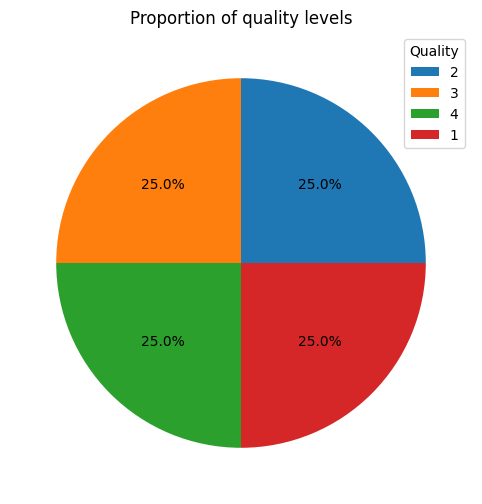

In [315]:
count = y_resampled.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

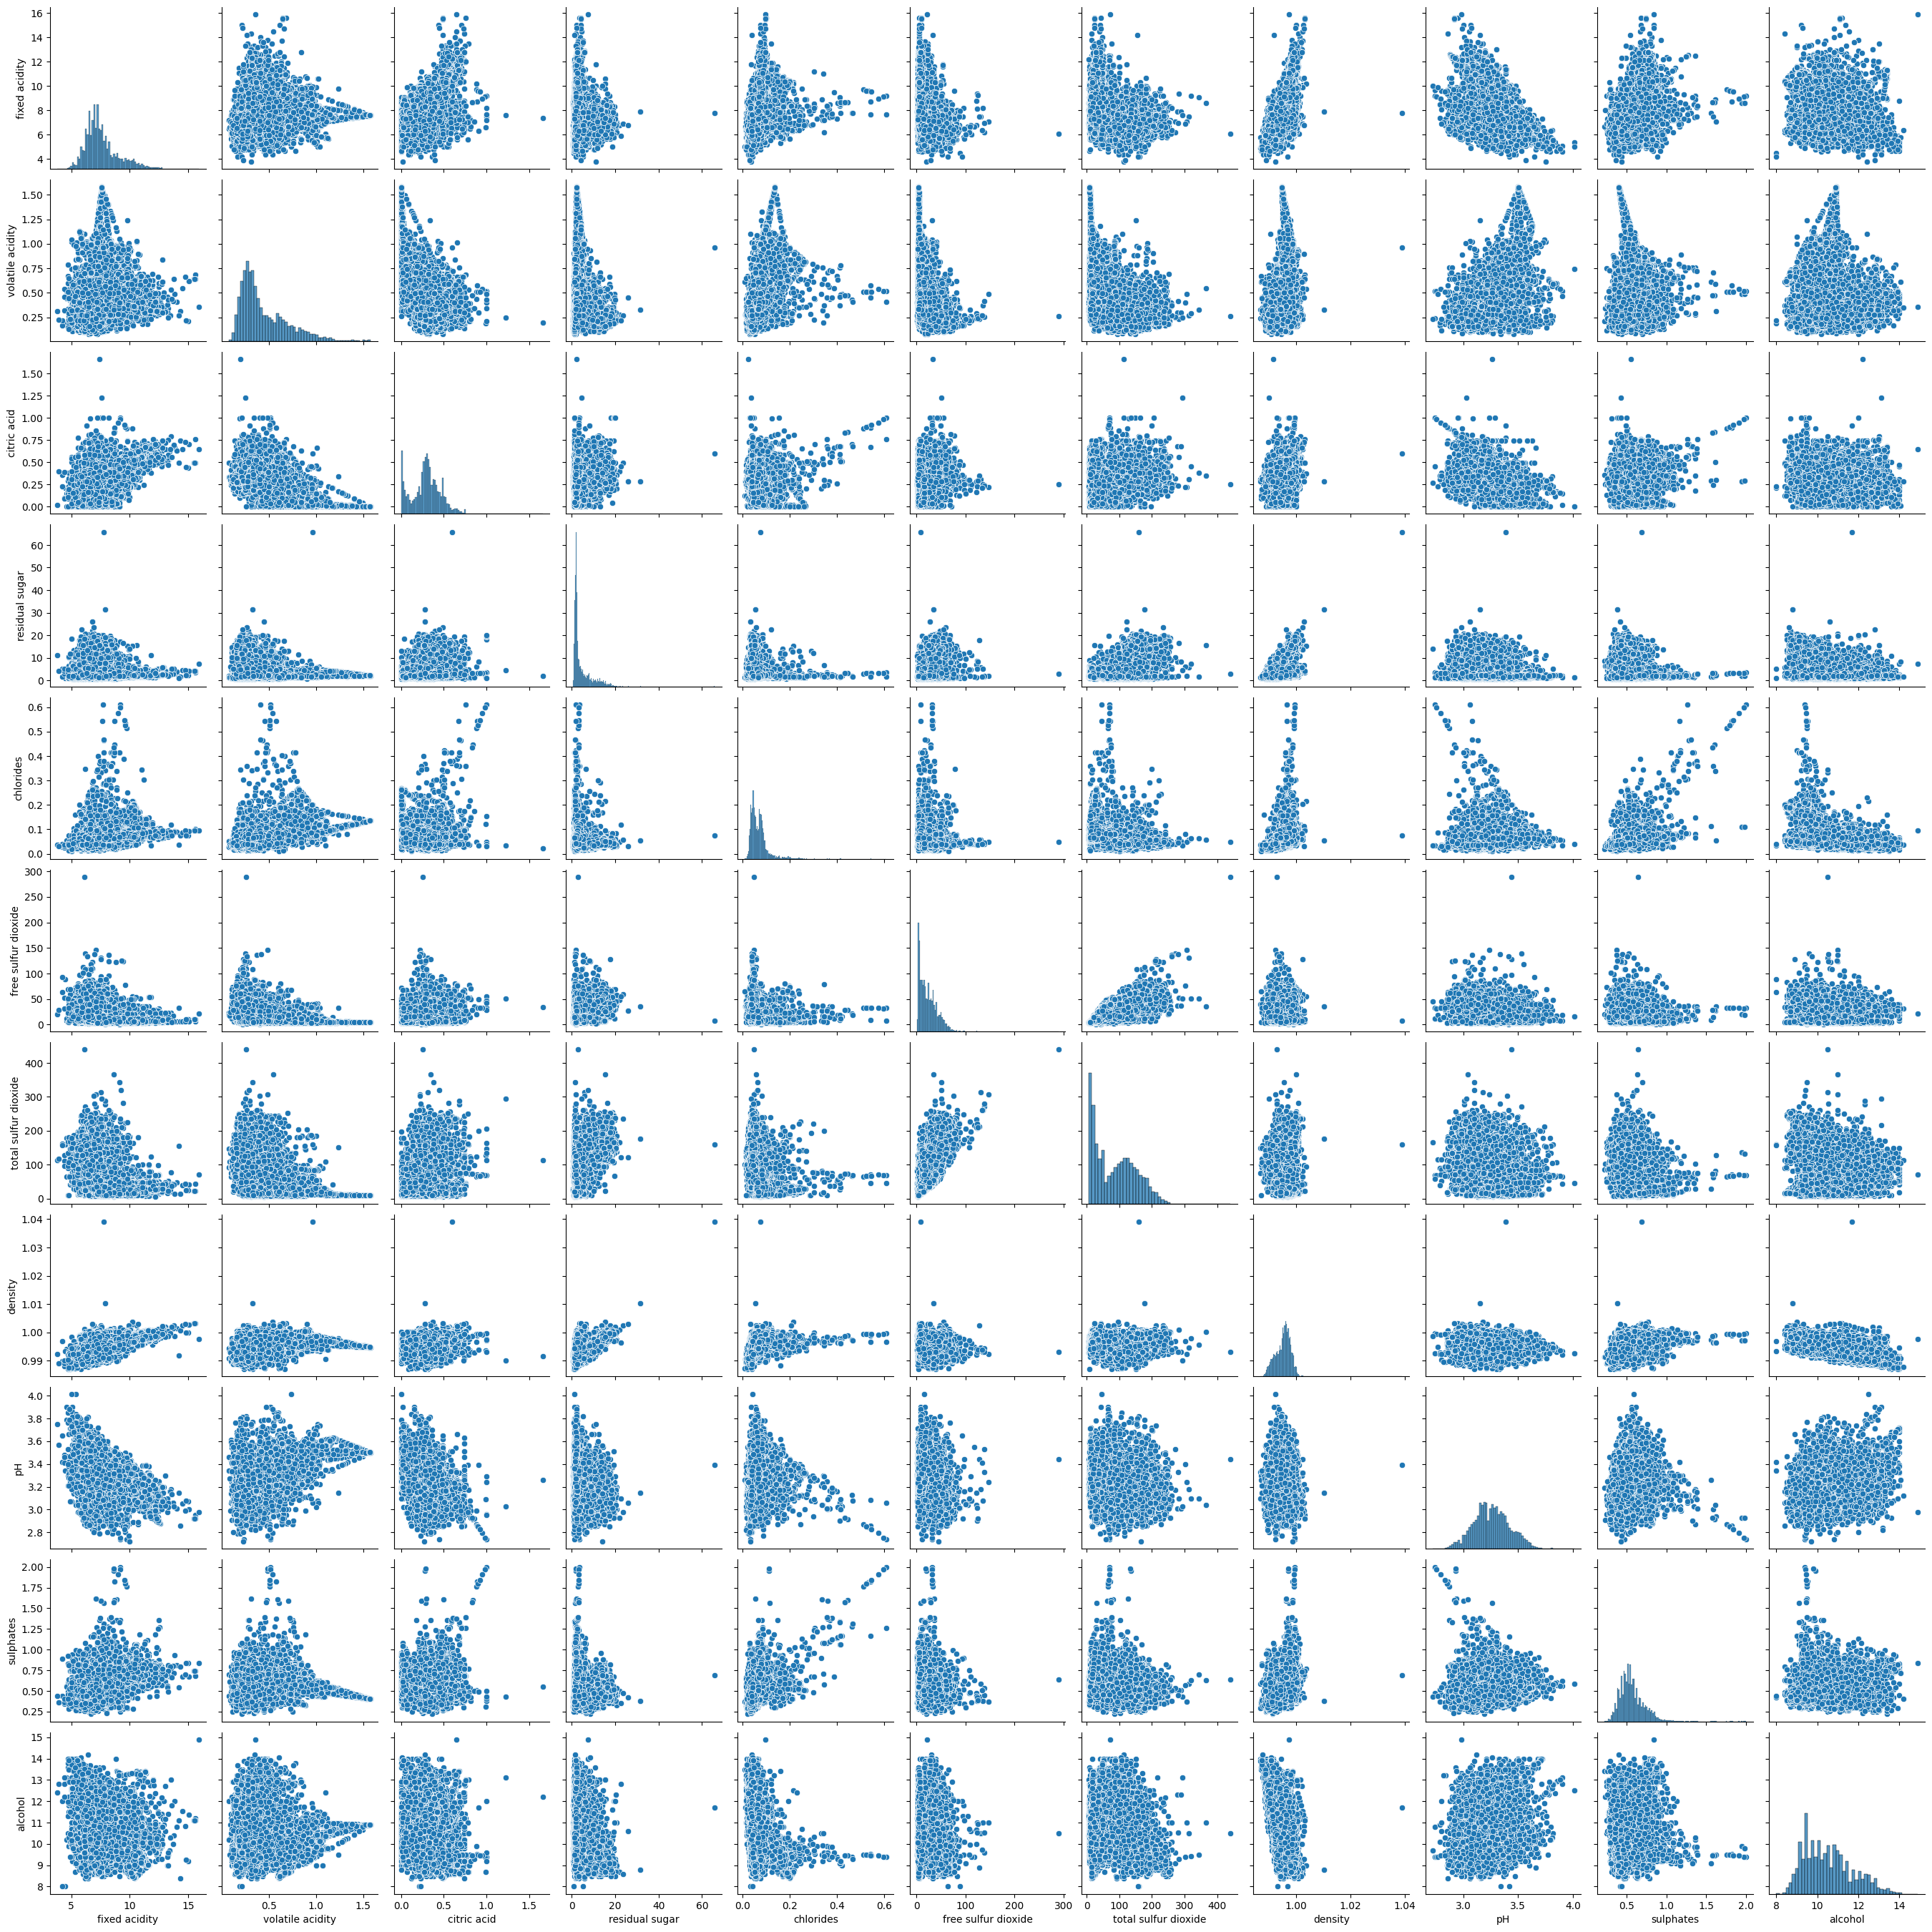

In [316]:
sns.pairplot(X_resampled.drop(columns='color'))

In the pairplot, is not visible any clear correlation among the features, also the distribution, are, in large case, unknown. This is due the fact that we melted the two datasets together, leading to a reshuffling of the distribution of each features.

## Feature Engineering and Selection

#### Correlation matrix and collinearity with `quality` feature

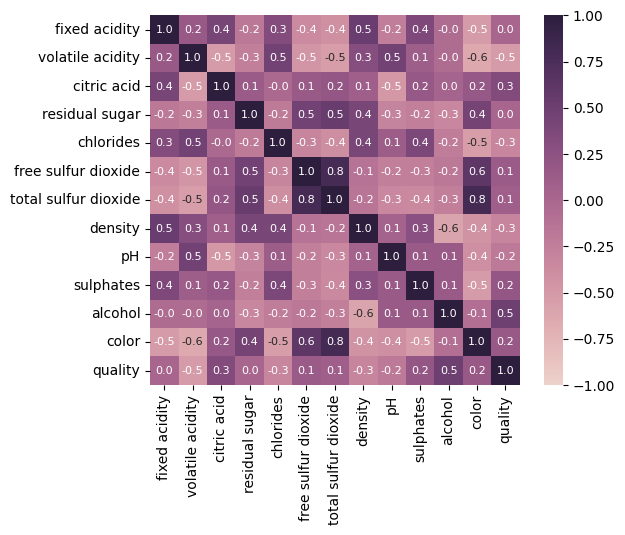

In [319]:
data_engineered = data.copy()

correlation = data_engineered.corr()

axis_corr = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.cubehelix_palette(as_cmap=True),
    square=True,
    annot=True,
    fmt=".1f",
    annot_kws={"size": 8}
)

plt.show()

As we can see from the correlation matrix, there are some features that are highly correlated with each other. This can lead to collinearity issues in our model, so we will need to be careful about which features we include in our final model. For instance `total sulfur dioxide` and `free sulfur dioxide` have 0.8 correlation coefficient, so we will drop them in favor of a new feature that rapresents the difference called `bound sulfur dioxide`

In [320]:
data_engineered['bound sulfur dioxide'] = data_engineered['total sulfur dioxide'] - data_engineered['free sulfur dioxide']
data_engineered.drop(columns=['total sulfur dioxide', 'free sulfur dioxide'], inplace=True)
data_engineered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,color,quality,bound sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,2,23.0
1,7.8,0.88,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,0,2,42.0
2,7.8,0.76,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,0,2,39.0
3,11.2,0.28,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,0,3,43.0
4,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,2,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,0.99114,3.27,0.50,11.2,1,3,68.0
8980,6.6,0.32,0.36,8.0,0.047,0.99490,3.15,0.46,9.6,1,2,111.0
8981,6.5,0.24,0.19,1.2,0.041,0.99254,2.99,0.46,9.4,1,3,81.0
8982,5.5,0.29,0.30,1.1,0.022,0.98869,3.34,0.38,12.8,1,4,90.0


Moreover, `free sulfur dioxide` and `color` have a correlation coefficient of 0.6, but we believe that most of the values of the feature have that value because of the type of the wine (red and white). So, we choose not to drop these features.

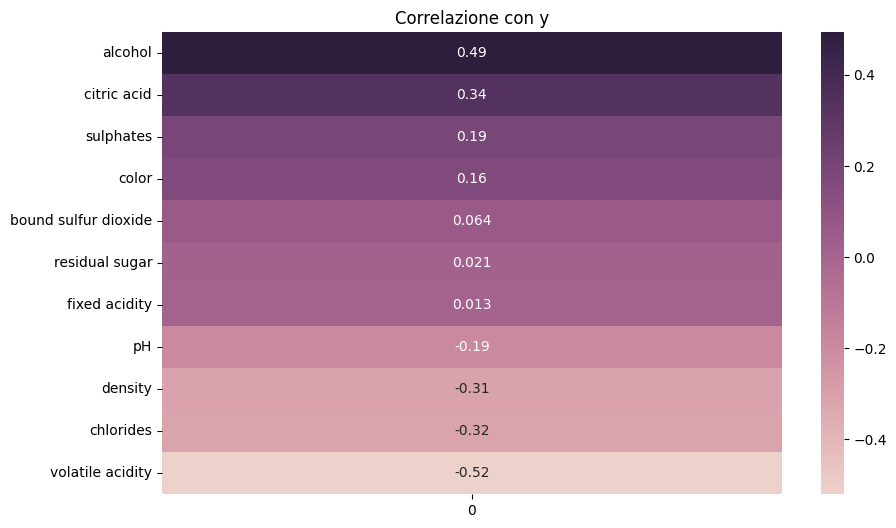

In [321]:
X_engineered = data_engineered.drop(columns=['quality'])
y_engineered = data_engineered['quality']

corr = X_engineered.corrwith(y_engineered)

corr_sorted = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_sorted.to_frame(),
    annot=True,
    cmap=sns.cubehelix_palette(as_cmap=True),
)
plt.title('Correlazione con y')
plt.show()

Finally, we whould like to drop the features that are under 0.2 for their correlation with the `quality` feature but we have too few observations, so we will keep all the features. Another thing to take into account is that the new added feature `bound sulfur dioxide` seems not to add information  to the overall scenario, so we can think to not do feature engineering to the dataset.

In [322]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y_engineered, test_size=0.2, random_state=42)

def evaluate_model(models, X_train, y_train, X_test, y_test):
    for model in models:
        acc_sum = 0
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_sum += accuracy_score(y_test, y_pred)
    return acc_sum / len(models)

# Evaluate different models
models_for_evaluation = {
    DecisionTreeClassifier(random_state=42),
    MLPClassifier(random_state=42, max_iter=500)
}

accuracy_eng = evaluate_model(models_for_evaluation, X_train_eng, y_train_eng, X_test_eng, y_test_eng)
accuracy_noeng = evaluate_model(models_for_evaluation, X_train, y_train, X_test, y_test)

print(f"Accuracy with engineering: {accuracy_eng:.2f}")
print(f"Accuracy without engineering: {accuracy_noeng:.2f}")


Accuracy with engineering: 0.28
Accuracy without engineering: 0.33


The avarage accuracy seems to be a worst in the engineered case, so what we have done until now is not useful. We will keep the original dataset and try to improve the model with a better hyperparameter tuning.

This choice is also reasonable considering the limited number of available features, which reduces the total variance of the information.


## Principal Component Analysis(PCA)

In [323]:
X_scaled = X_resampled.copy()

cols_to_scale = X_scaled.columns.difference(['color'])

scaler = StandardScaler()
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

In [324]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

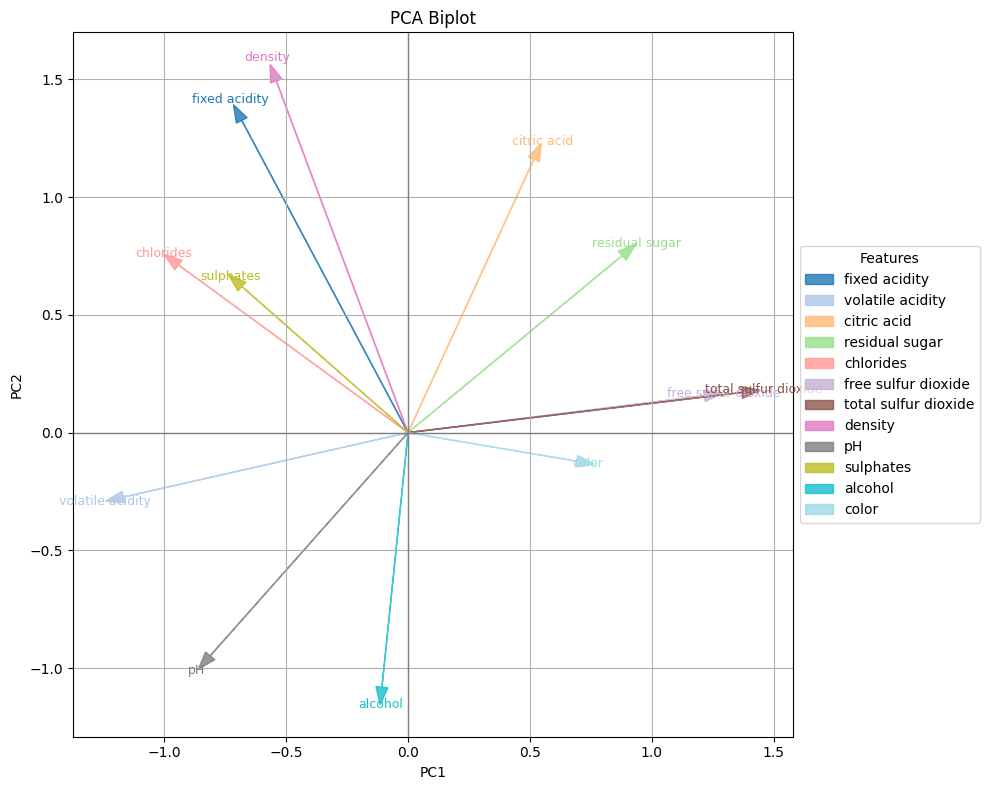

In [325]:
loadings = pca.components_.T 
feature_names = X_scaled.columns

cmap = cm.get_cmap('tab20', len(feature_names))  
plt.figure(figsize=(10, 8))

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              loadings[i, 0] * 3,
              loadings[i, 1] * 3,
              color=cmap(i), alpha=0.8, head_width=0.05, label=feature)
    plt.text(loadings[i, 0] * 3.2,
             loadings[i, 1] * 3.2,
             feature, color=cmap(i), ha='center', va='center', fontsize=9)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Features")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")

plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.tight_layout()
plt.show()

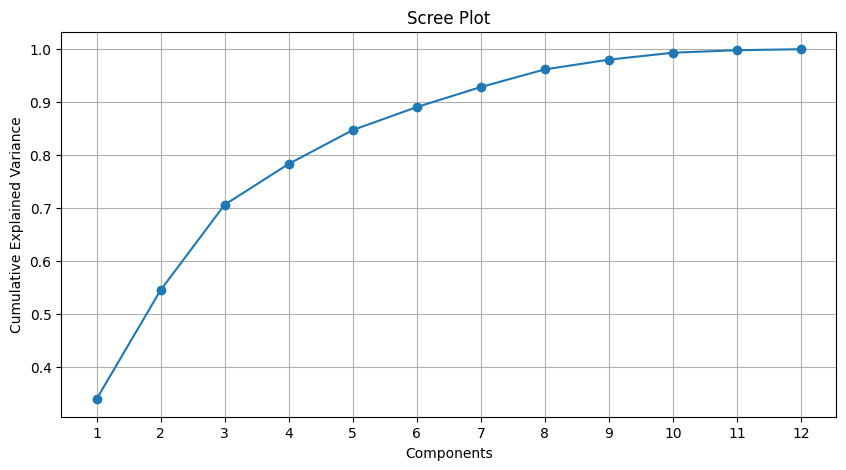

In [326]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.xticks(np.arange(1, len(pca_full.explained_variance_ratio_) + 1, 1))
plt.show()

Let's check how much variance each principal component explains. We can see that the first four components explain around 80% of the amount of variance, which suggests that PCA could be useful for dimensionality reduction in this dataset. Anyway, we made similar considerations in the previous section, showing that reducing the number of feature leads to a worse model, so we will not use PCA in this case.

In [327]:
pve = pca_full.explained_variance_ratio_
for i, v in enumerate(pve):
    print(f"PC{i+1}: {v:.4f}")

print("\nFirst four components cumulative explained variance:\n",
      pca_full.explained_variance_ratio_[0:4].sum())

PC1: 0.3393
PC2: 0.2058
PC3: 0.1613
PC4: 0.0770
PC5: 0.0640
PC6: 0.0434
PC7: 0.0379
PC8: 0.0333
PC9: 0.0184
PC10: 0.0131
PC11: 0.0047
PC12: 0.0019

First four components cumulative explained variance:
 0.7834116481950388


### Model Selection and Training

We trained multiple classification models, such as:
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Multilayer Perceptron (MLP)

We used k-Fold Cross-Validation to mitigate overfitting.


In [328]:
models = {
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'MLP': MLPClassifier(max_iter=2000,random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
# Scaling the dataset
cols_to_scale = X.columns.difference(['color'])

scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

Training all the models to select the best performing ones.

In [330]:

best_model = None
best_accuracy = 0
results = {}
best_models ={}

for name, model in models.items():

    # We don't need the scaled data for Decision Tree
    if name == 'Decision Tree':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    # If the model has an accuracy >= 0.7, we save it
    if acc >= 0.7:
        best_models[name] = model


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f"Best model: {best_model} with accuracy {best_accuracy:.4f}")

SVM Accuracy: 0.7140
Logistic Regression Accuracy: 0.6641
MLP Accuracy: 0.7274
Decision Tree Accuracy: 0.7535
Best model: Decision Tree with accuracy 0.7535


In [331]:
best_models

{'SVM': SVC(random_state=42),
 'MLP': MLPClassifier(max_iter=2000, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42)}

We define a few hyperparameters to tune for each model. We will use GridSearchCV to find the best hyperparameters for each model. 

In [332]:
param_grids = {
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'alpha': [0.0001, 0.001]
    },
    'Decision Tree': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    }
}

# FIltering to tune only the models that have been saved into best_models
param_grids = {k: v for k, v in param_grids.items() if k in best_models}
param_grids

{'MLP': {'hidden_layer_sizes': [(50,), (100,), (100, 50)],
  'alpha': [0.0001, 0.001]},
 'Decision Tree': {'max_depth': [5, 10, None],
  'min_samples_split': [2, 5, 10]},
 'SVM': {'C': [0.1, 1, 10]}}

In [333]:
if debug:
    for name, model in best_models.items():
        if name != 'Decision Tree':
            x_train = X_train_scaled
        else:
            x_train = X_train

        grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=1)

        grid.fit(x_train, y_train)

        print("Model: ", name)
        print("Best Score: ", grid.best_score_)
        print("Best Params: ", grid.best_params_)

We obtained strong results across all models, and the MLP seems to have the best performance with 0.75 of grid search score. Next, we'll look at the test set accuracy to assess whether the model is overfitting.

In [334]:
if debug:
    model_mlp = MLPClassifier(
        hidden_layer_sizes=(100,50),
        alpha = 0.0001,
        random_state=42,
    )

    model_mlp.fit(X_train_scaled, y_train)

    y_pred_test = model_mlp.predict(X_test_scaled)

    print("\nTesting")
    print(classification_report(y_test, y_pred_test))

The difference between training and testing accuracy is small, which suggests that the model is reliable.

In conclusion, the best model found using SMOTE oversampling is a Multi-Layer Perceptron Classifier with two hidden layers (the first with 100 neurons and the second with 50) and alpha value of 0.0001

It achieved a testing accuracy of 73%.

## Wider Parameter-space Grid search 

We are trying to optimize the MLPClassifier with a wider parameter space.
The parameters are:
- `hidden_layer_sizes`: [ (128,), (128, 64), (128, 64, 32)]

- `activation`: ['relu', 'tanh']

- `solver`: ['adam', 'sgd'] 

- `alpha`: loguniform(1e-5, 1e-1) 

- `learning_rate`: ['constant', 'adaptive'] 

- `learning_rate_init`: loguniform(1e-4, 1e-1) 

In [335]:
if debug:
    pipeline = make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=42))

    param_dist = {
        'mlpclassifier__hidden_layer_sizes': [ (128,), (128, 64), (128, 64, 32)],
        'mlpclassifier__activation': ['relu', 'tanh'],
        'mlpclassifier__solver': ['adam', 'sgd'],
        'mlpclassifier__alpha': loguniform(1e-5, 1e-1),
        'mlpclassifier__learning_rate': ['constant', 'adaptive'],
        'mlpclassifier__learning_rate_init': loguniform(1e-4, 1e-1),
    }

    random_search = GridSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=3
    )

    random_search.fit(X_train, y_train)

    y_pred = random_search.best_estimator_.predict(X_test)

    print("Best hyperparams: ", random_search.best_params_)
    print("Accuracy test set:", accuracy_score(y_test, y_pred))
    print("Classification Report:", classification_report(y_test, y_pred))


In [ ]:
# Found with GridSearchCV
best_params = {
    'mlpclassifier__activation': 'relu', 
    'mlpclassifier__alpha': np.float64(0.008013508750140624), 
    'mlpclassifier__hidden_layer_sizes': (128, 64, 32), 
    'mlpclassifier__learning_rate': 'adaptive', 
    'mlpclassifier__learning_rate_init': np.float64(0.04584154780136381),
    'mlpclassifier__solver': 'sgd'
}

best_params = {k.replace('mlpclassifier__', ''): v for k, v in best_params.items()}

model = make_pipeline(StandardScaler(), MLPClassifier(**best_params, max_iter=2000, random_state=42))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {acc:.4f}")
print(classification_report(y_test, y_pred))

model_path = f'{resource_folder}/model.pkl'
if not os.path.exists(model_path):
    with open(model_path, 'wb') as f:
        dump(model, f)
        print("Model saved to model.pkl")
else:
    print("Model already exists. Skipping save.")

dataset_path = f'{resource_folder}/datasets.pkl'
if not os.path.exists(dataset_path):
    with open(dataset_path, 'wb') as f:
        dump((X_train, X_test, y_train, y_test), f)
        print("Datasets saved to datasets.pkl")
else:
    print("Datasets already exist. Skipping save.")


Accuracy test: 0.8108
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       561
           2       0.77      0.78      0.77       586
           3       0.68      0.66      0.67       563
           4       0.86      0.85      0.85       594

    accuracy                           0.81      2304
   macro avg       0.81      0.81      0.81      2304
weighted avg       0.81      0.81      0.81      2304

Model already exists. Skipping save.
Datasets already exist. Skipping save.
